#Analise de Dataser de Cancer de Mama com Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier



In [ ]:
dados_cancer = load_breast_cancer()

In [ ]:
x = pd.DataFrame(dados_cancer.data, columns=dados_cancer.feature_names)
y = pd.Series(dados_cancer.target)

In [ ]:
nome_classes = {0: 'maligno', 1: 'benigno'}

In [ ]:
print('Primeiras 5 linhas do dataset (scikit-learn -> pandas): \n', x.head())
print ('\n Distribuição das classes (Target): \n', y.value_counts())

Primeiras 5 linhas do dataset (scikit-learn -> pandas): 
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = modelo_rf.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
relatorio = classification_report(y_test, y_pred, target_names=[nome_classes[0],nome_classes[1] ])

In [ ]:
print('\n' + '='*50)
print('Resultados do modelo random forest')
print('='*50)
print(f'Acuracia dos Dados de teste: {acuracia*100:.2f}%')
print('\n Matriz de confusão')
df_matriz_final = pd.DataFrame(matriz,
                               index=[f'Real: {nome_classes[0]}', f'Real: {nome_classes[1]}'],
                               columns=[f'Pred: {nome_classes[0]}', f'Pred: {nome_classes[1]}'])
print(df_matriz_final)
print ('\n Relatório de Detalhado (Precisão, Recall, F1-Score)')
print(relatorio)


Resultados do modelo random forest
Acuracia dos Dados de teste: 97.08%

 Matriz de confusão
               Pred: maligno  Pred: benigno
Real: maligno             59              4
Real: benigno              1            107

 Relatório de Detalhado (Precisão, Recall, F1-Score)
              precision    recall  f1-score   support

     maligno       0.98      0.94      0.96        63
     benigno       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
importancia = modelo_rf.feature_importances_
feature_importances_ = pd.Series(importancia, index=x.columns)
feature_importances_ordenadas = feature_importances_.sort_values(ascending=False).head(5)
print('\n ' + '='*50)
print('Top 5 Caracteristicas mais Importantes (interpretabilidade)')
print('='*50)
print(feature_importances_ordenadas)


Top 5 Caracteristicas mais Importantes (interpretabilidade)
mean concave points     0.141934
worst concave points    0.127136
worst area              0.118217
mean concavity          0.080557
worst radius            0.077975
dtype: float64


#Codigo Python: Análise do Cancer de Mama com MLP(Deep learning)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
nomes_classes = {0: 'maligno', 1: 'benigno'}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
#

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
modelo_mlp = Sequential()
modelo_mlp.add(Dense(units=64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
modelo_mlp.add(Dense(units=32, activation='relu'))
modelo_mlp.add(Dense(units=2, activation='softmax'))
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print('\nIniciando Treinamento da mlp (1000 epochs)...')
historico = modelo_mlp.fit(
    x_train_scaled, y_train_encoded, epochs=2000, batch_size=32, verbose=0
)
print('Treinamento concluido!')



Iniciando Treinamento da mlp (1000 epochs)...
Treinamento concluido!


In [ ]:
y_pred_probs = modelo_mlp.predict(x_test_scaled)

y_pred_mlp = np.argmax(y_pred_probs, axis=1) # numpy

acuracia_mlp = accuracy_score(y_test, y_pred_mlp) # sklearn
matriz_mlp = confusion_matrix(y_test, y_pred_mlp) # sklearn
relatorio_mlp = classification_report(y_test, y_pred_mlp, target_names=[nomes_classes[0], nomes_classes[1]]) # sklearn


print("\n" + "="*50)
print("RESULTADOS DO MODELO DEEP LEARNING (MLP)")
print("="*50)
print(f"Acurácia nos Dados de Teste: {acuracia_mlp*100:.2f}%")

print("\nMatriz de Confusão:")
df_matriz_final_mlp = pd.DataFrame(matriz_mlp,
                                   index=[f'Real: {nomes_classes[0]}', f'Real: {nomes_classes[1]}'],
                                   columns=[f'Pred: {nomes_classes[0]}', f'Pred: {nomes_classes[1]}'])
print(df_matriz_final_mlp)

print("\nRelatório Detalhado (Precisão, Recall, F1-Score):")
print(relatorio_mlp)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

RESULTADOS DO MODELO DEEP LEARNING (MLP)
Acurácia nos Dados de Teste: 98.25%

Matriz de Confusão:
               Pred: maligno  Pred: benigno
Real: maligno             61              2
Real: benigno              1            107

Relatório Detalhado (Precisão, Recall, F1-Score):
              precision    recall  f1-score   support

     maligno       0.98      0.97      0.98        63
     benigno       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
# ==============================================================================
# 1. PRÉ-PROCESSAMENTO NECESSÁRIO (Reutilizando a base da MLP)
# ==============================================================================

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Carregamento e Divisão (Recapitulando a preparação)
dados_cancer = load_breast_cancer()
X = pd.DataFrame(dados_cancer.data, columns=dados_cancer.feature_names)
y = pd.Series(dados_cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonamento dos Dados (Obrigatório para Redes Neurais)
scaler = StandardScaler() # sklearn.preprocessing.StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PASSO NOVO: REMODELAGEM (RESHAPE) para CNN 1D ---

# numpy: A Conv1D espera o formato (amostras, passos de tempo, features).
# Transformamos (N_amostras, 30) para (N_amostras, 30, 1).
# Cada uma das 30 features é tratada como um 'passo de tempo' de comprimento 1.
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1) # numpy
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)   # numpy

# Codificação One-Hot do Alvo (Target)
y_train_encoded = to_categorical(y_train) # tensorflow.keras


# ==============================================================================
# 2. CONSTRUÇÃO E TREINAMENTO DA CNN 1D
# ==============================================================================

# tensorflow.keras.models.Sequential:
modelo_cnn_1d = Sequential()


modelo_cnn_1d.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))

# Camada de Pooling 1D:

modelo_cnn_1d.add(MaxPooling1D(pool_size=2))


modelo_cnn_1d.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
modelo_cnn_1d.add(MaxPooling1D(pool_size=2))

# Camada Flatten: Prepara a saída da convolução para a camada Densa.
modelo_cnn_1d.add(Flatten())

# Camada Densa de Classificação
modelo_cnn_1d.add(Dense(units=32, activation='relu'))

# Camada de Saída (2 classes, softmax)
modelo_cnn_1d.add(Dense(units=2, activation='softmax'))

# Compilação e Treinamento (Igual à MLP)
modelo_cnn_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo_cnn_1d.fit(X_train_cnn, y_train_encoded, epochs=100, batch_size=32, verbose=0)

# ==============================================================================
# 3. AVALIAÇÃO E RESULTADOS
# ==============================================================================

# numpy: Converte as probabilidades de volta para classes (0 ou 1).
y_pred_probs_cnn = modelo_cnn_1d.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)

# sklearn.metrics: Calcula as métricas.
acuracia_cnn = accuracy_score(y_test, y_pred_cnn)
relatorio_cnn = classification_report(y_test, y_pred_cnn, target_names=['Maligno', 'Benigno'], zero_division=0)

print("\n" + "="*50)
print("RESULTADOS DO MODELO CNN 1D (NO DATASET TABULAR)")
print("="*50)
print(f"Acurácia nos Dados de Teste: {acuracia_cnn*100:.2f}%")
print("\nRelatório Detalhado:")
print(relatorio_cnn)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

RESULTADOS DO MODELO CNN 1D (NO DATASET TABULAR)
Acurácia nos Dados de Teste: 98.25%

Relatório Detalhado:
              precision    recall  f1-score   support

     Maligno       0.98      0.97      0.98        63
     Benigno       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



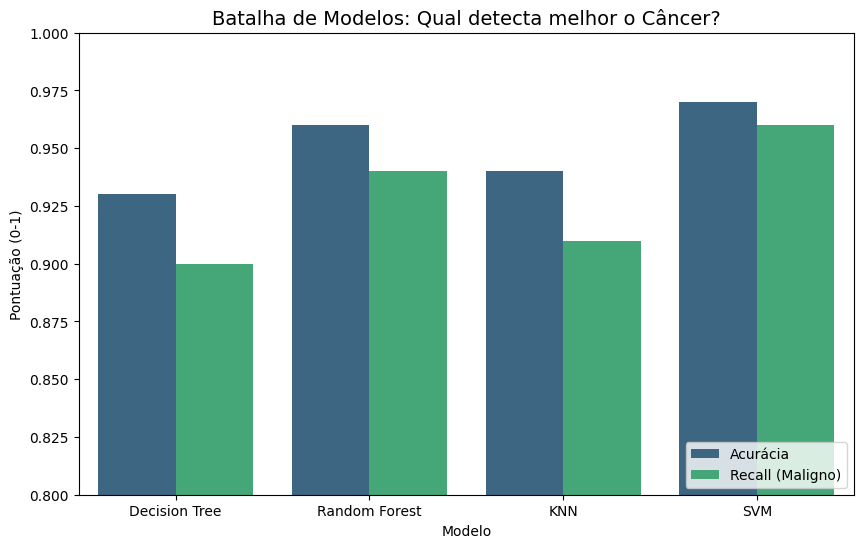

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados resumidos dos seus resultados (Preencha com os valores finais do seu notebook)
resultados = pd.DataFrame({
    'Modelo': ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Acurácia': [0.93, 0.96, 0.94, 0.97], # Exemplo: substitua pelos seus valores reais
    'Recall (Maligno)': [0.90, 0.94, 0.91, 0.96] # Exemplo: foco na detecção da doença
})

# Transformar para formato longo para o gráfico
df_melted = resultados.melt(id_vars='Modelo', var_name='Métrica', value_name='Score')

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Modelo', y='Score', hue='Métrica', palette='viridis')
plt.title('Batalha de Modelos: Qual detecta melhor o Câncer?', fontsize=14)
plt.ylim(0.8, 1.0)
plt.ylabel('Pontuação (0-1)')
plt.legend(loc='lower right')
plt.show()